In [ ]:
!pip install darts
!pip install pyyaml==5.4.1


In [ ]:
!pip uninstall -y matplotlib
!pip install matplotlib==3.1.3

In [94]:
import pandas as pd
from darts import TimeSeries

df = pd.read_csv('https://raw.githubusercontent.com/icarocamelo/inf-6333-applied-ai/main/dataset/node1.csv', header=None, parse_dates=True)
df.columns = ['Unix Timestamp', 'Timestamp', 'Busy System', 'Busy User', 'Busy Iowait', 'Busy IRQs', 'Busy Other', 'Idle']
df = df.drop(columns=['Unix Timestamp', 'Timestamp', 'Busy User', 'Busy Iowait', 'Busy IRQs', 'Busy Other', 'Idle'])
# df.head(5)

ts = TimeSeries.from_dataframe(df)
# ts

In [22]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline

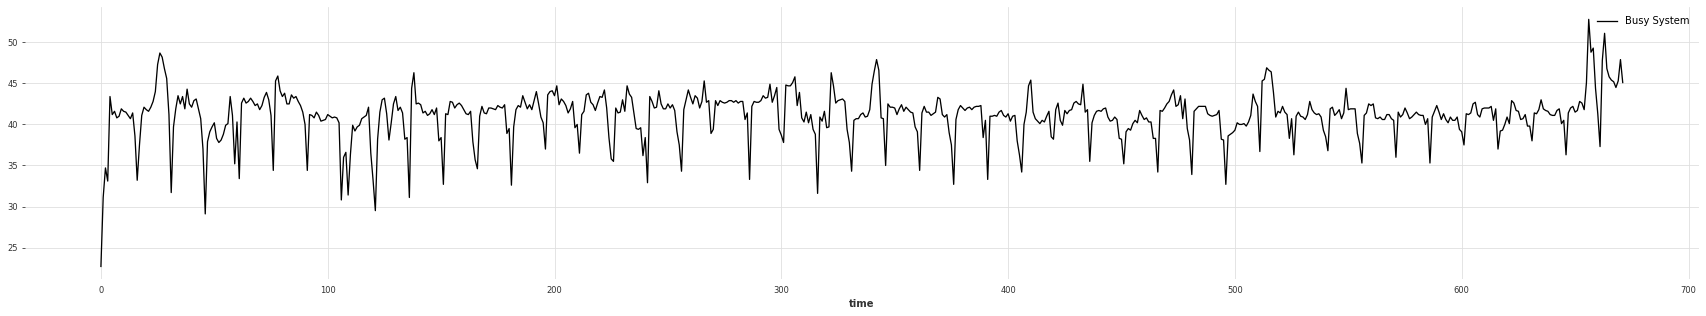

In [49]:
df.plot(label="Busy System", figsize=(30, 5))
plt.legend();

Scaling dataset

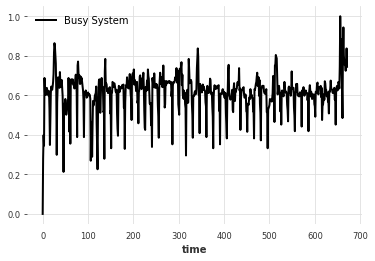

In [95]:
from darts.dataprocessing.transformers import Scaler

# creating scaler object
scaler_busy_usage = Scaler()
busy_system_scaled = scaler_busy_usage.fit_transform(ts)
busy_system_scaled.plot(label="Busy System")
plt.legend();

# Train test split
Excluded outliers (beginning and tail)

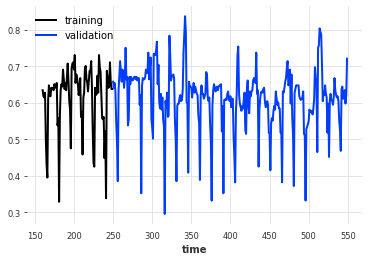

In [104]:
# train_ds = busy_system_scaled[100:250]
# train_ds
train_ds = busy_system_scaled[160:250]
val = busy_system_scaled[250:550]
train_ds.plot(label="training")
val.plot(label="validation")

In [98]:
from darts.models import NBEATSModel
model = NBEATSModel(input_chunk_length=50 , output_chunk_length=30, n_epochs = 100 , random_state = 15)

# fitting the model
# model.fit([train_ds], verbose = True)
model.fit([train_ds])

[2022-03-23 04:16:10,911] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 21 samples.
[2022-03-23 04:16:10,911] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 21 samples.
[2022-03-23 04:16:10,991] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-23 04:16:10,991] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.4 M 
-----------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.236    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

# Predict Results +  Evaluation

MAPE - Mean Average Precession Error

Predicting: 1it [00:00, ?it/s]

Mape = 10.87%


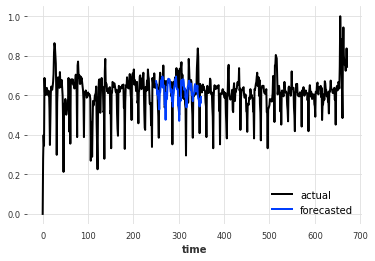

In [100]:
from darts.metrics import mape
pred_busy = model.predict(n = 100, series = train_ds)

print("Mape = {:.2f}%".format(mape(busy_system_scaled , pred_busy)))

# plotting results
busy_system_scaled.plot(label = "actual")
pred_busy.plot(label = "forecasted") # validation data set
plt.legend()